<a href="https://colab.research.google.com/github/bipuladk60/zebrafish_object_detection_custom_trained_yolov5/blob/main/yolov5_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!pip install -r yolov5/requirements.txt

In [ ]:
#uploading the dataset
from google.colab import files  # If using Google Colab
uploaded = files.upload()  # This opens a file dialog for uploading


In [7]:
#unzipping the .zip file
import zipfile
import os

# Define the path to your uploaded zip file
zip_file_path = '/content/zebrafish-dataset.zip'

# Define the extraction path (e.g., extract in the current directory)
extract_to_path = '/content'  # Specify your desired extraction path

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Folder unzipped to {extract_to_path}")

Folder unzipped to /content


**Testing with the untrained yolov5 model**


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-12 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded


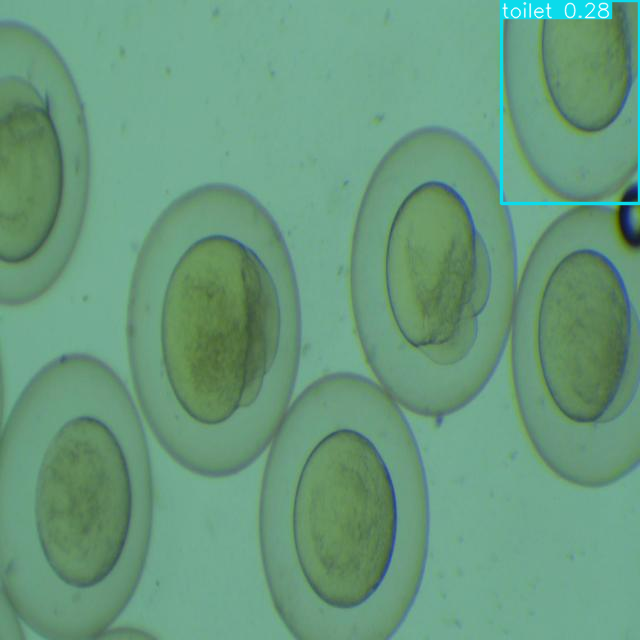

In [25]:
import torch
from matplotlib import pyplot as plt

# Load an untrained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
# model.nc = 7  # Set the number of classes to match your dataset
# model.names = ['advanced', 'dead', 'empty', 'holder', 'returned', 'stage1', 'stage2-4']  # Your class names

# Run inference on the selected image by passing the image path
img_path = '/content/zebrafish-dataset/test/images/104_jpg.rf.4207afbbc66caefc81deb702cbeb8611.jpg'
results = model(img_path)

#Display Results
results.show()

Now training the model with the custom dataset that I imported from https://universe.roboflow.com/phdproject-b58ng/zebrafish-database/dataset/20

In [27]:
import torch

# Defining the path to your data.yaml file and any specific configurations
data_yaml_path = '/content/zebrafish-dataset/data.yaml'
weights = 'yolov5s.pt'
epochs = 100  # Number of epochs to train
batch_size = 16

python3: can't open file '/content/train.py': [Errno 2] No such file or directory


In [ ]:
# Change directory to YOLOv5
%cd /content/yolov5
# Run training
!python train.py --img 640 --batch {batch_size} --epochs {epochs} --data {data_yaml_path} --weights {weights} --project zebrafish-model --name exp

**Result:**
*This file provides a summary of training and validation metrics over epochs, including mAP, precision, recall, and losses. It’s an all-in-one visualization that gives viewers a quick overview of the model's performance.*

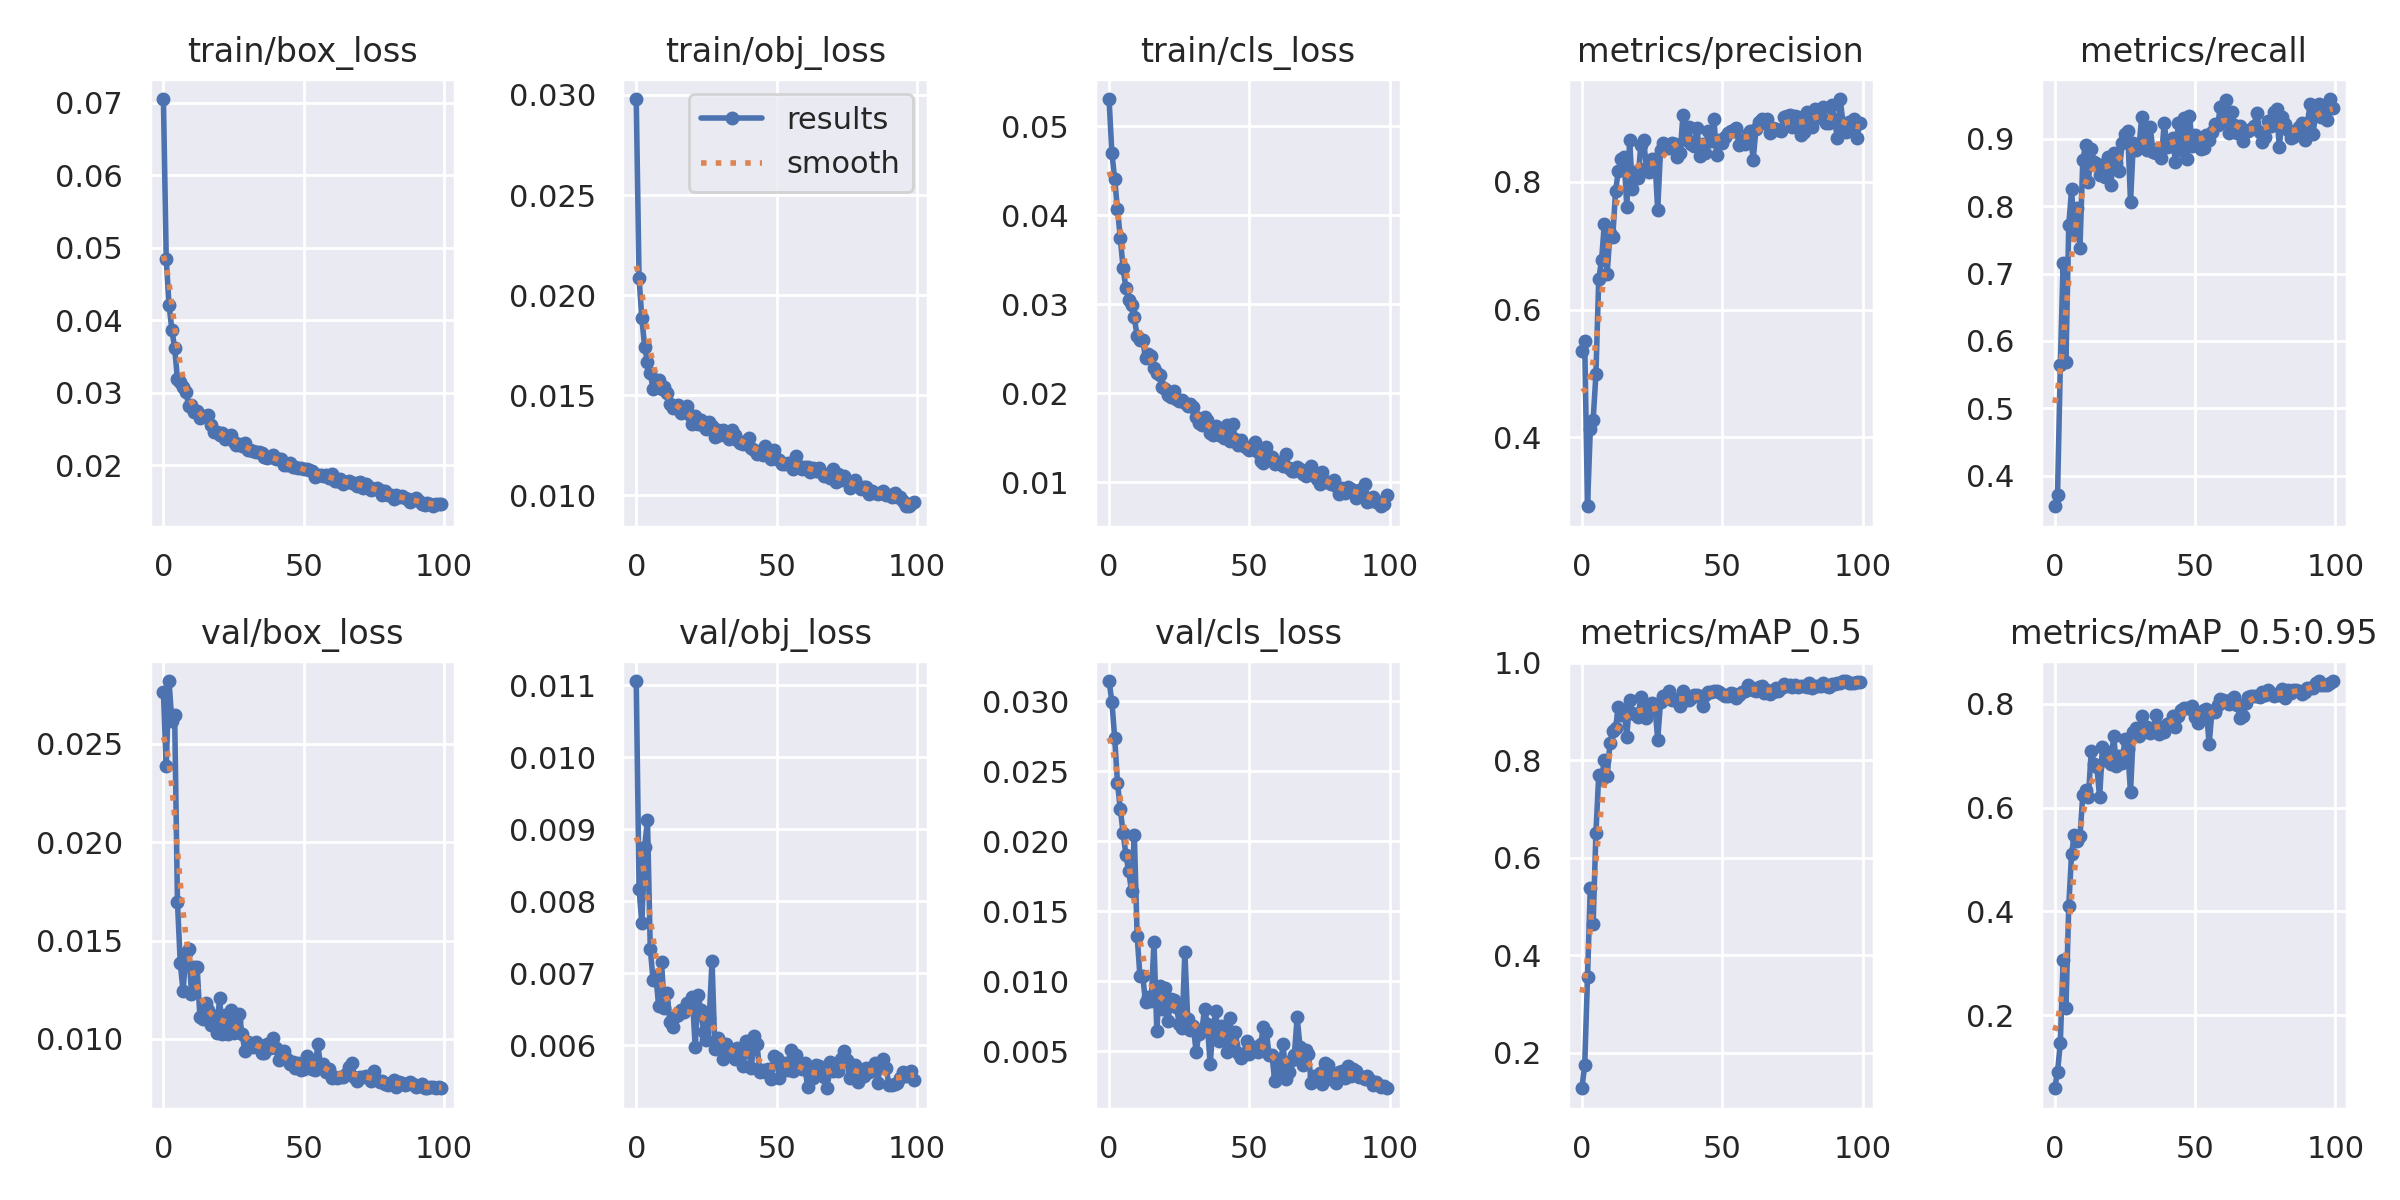

In [31]:
from IPython.display import Image
Image(filename='zebrafish-model/exp/results.png', width=800)

**confusion_matrix.png**

Purpose: *A confusion matrix helps illustrate how well the model performs on each class, showing true positives, false positives, and false negatives for each category. It’s particularly helpful to assess which classes the model struggles with.*


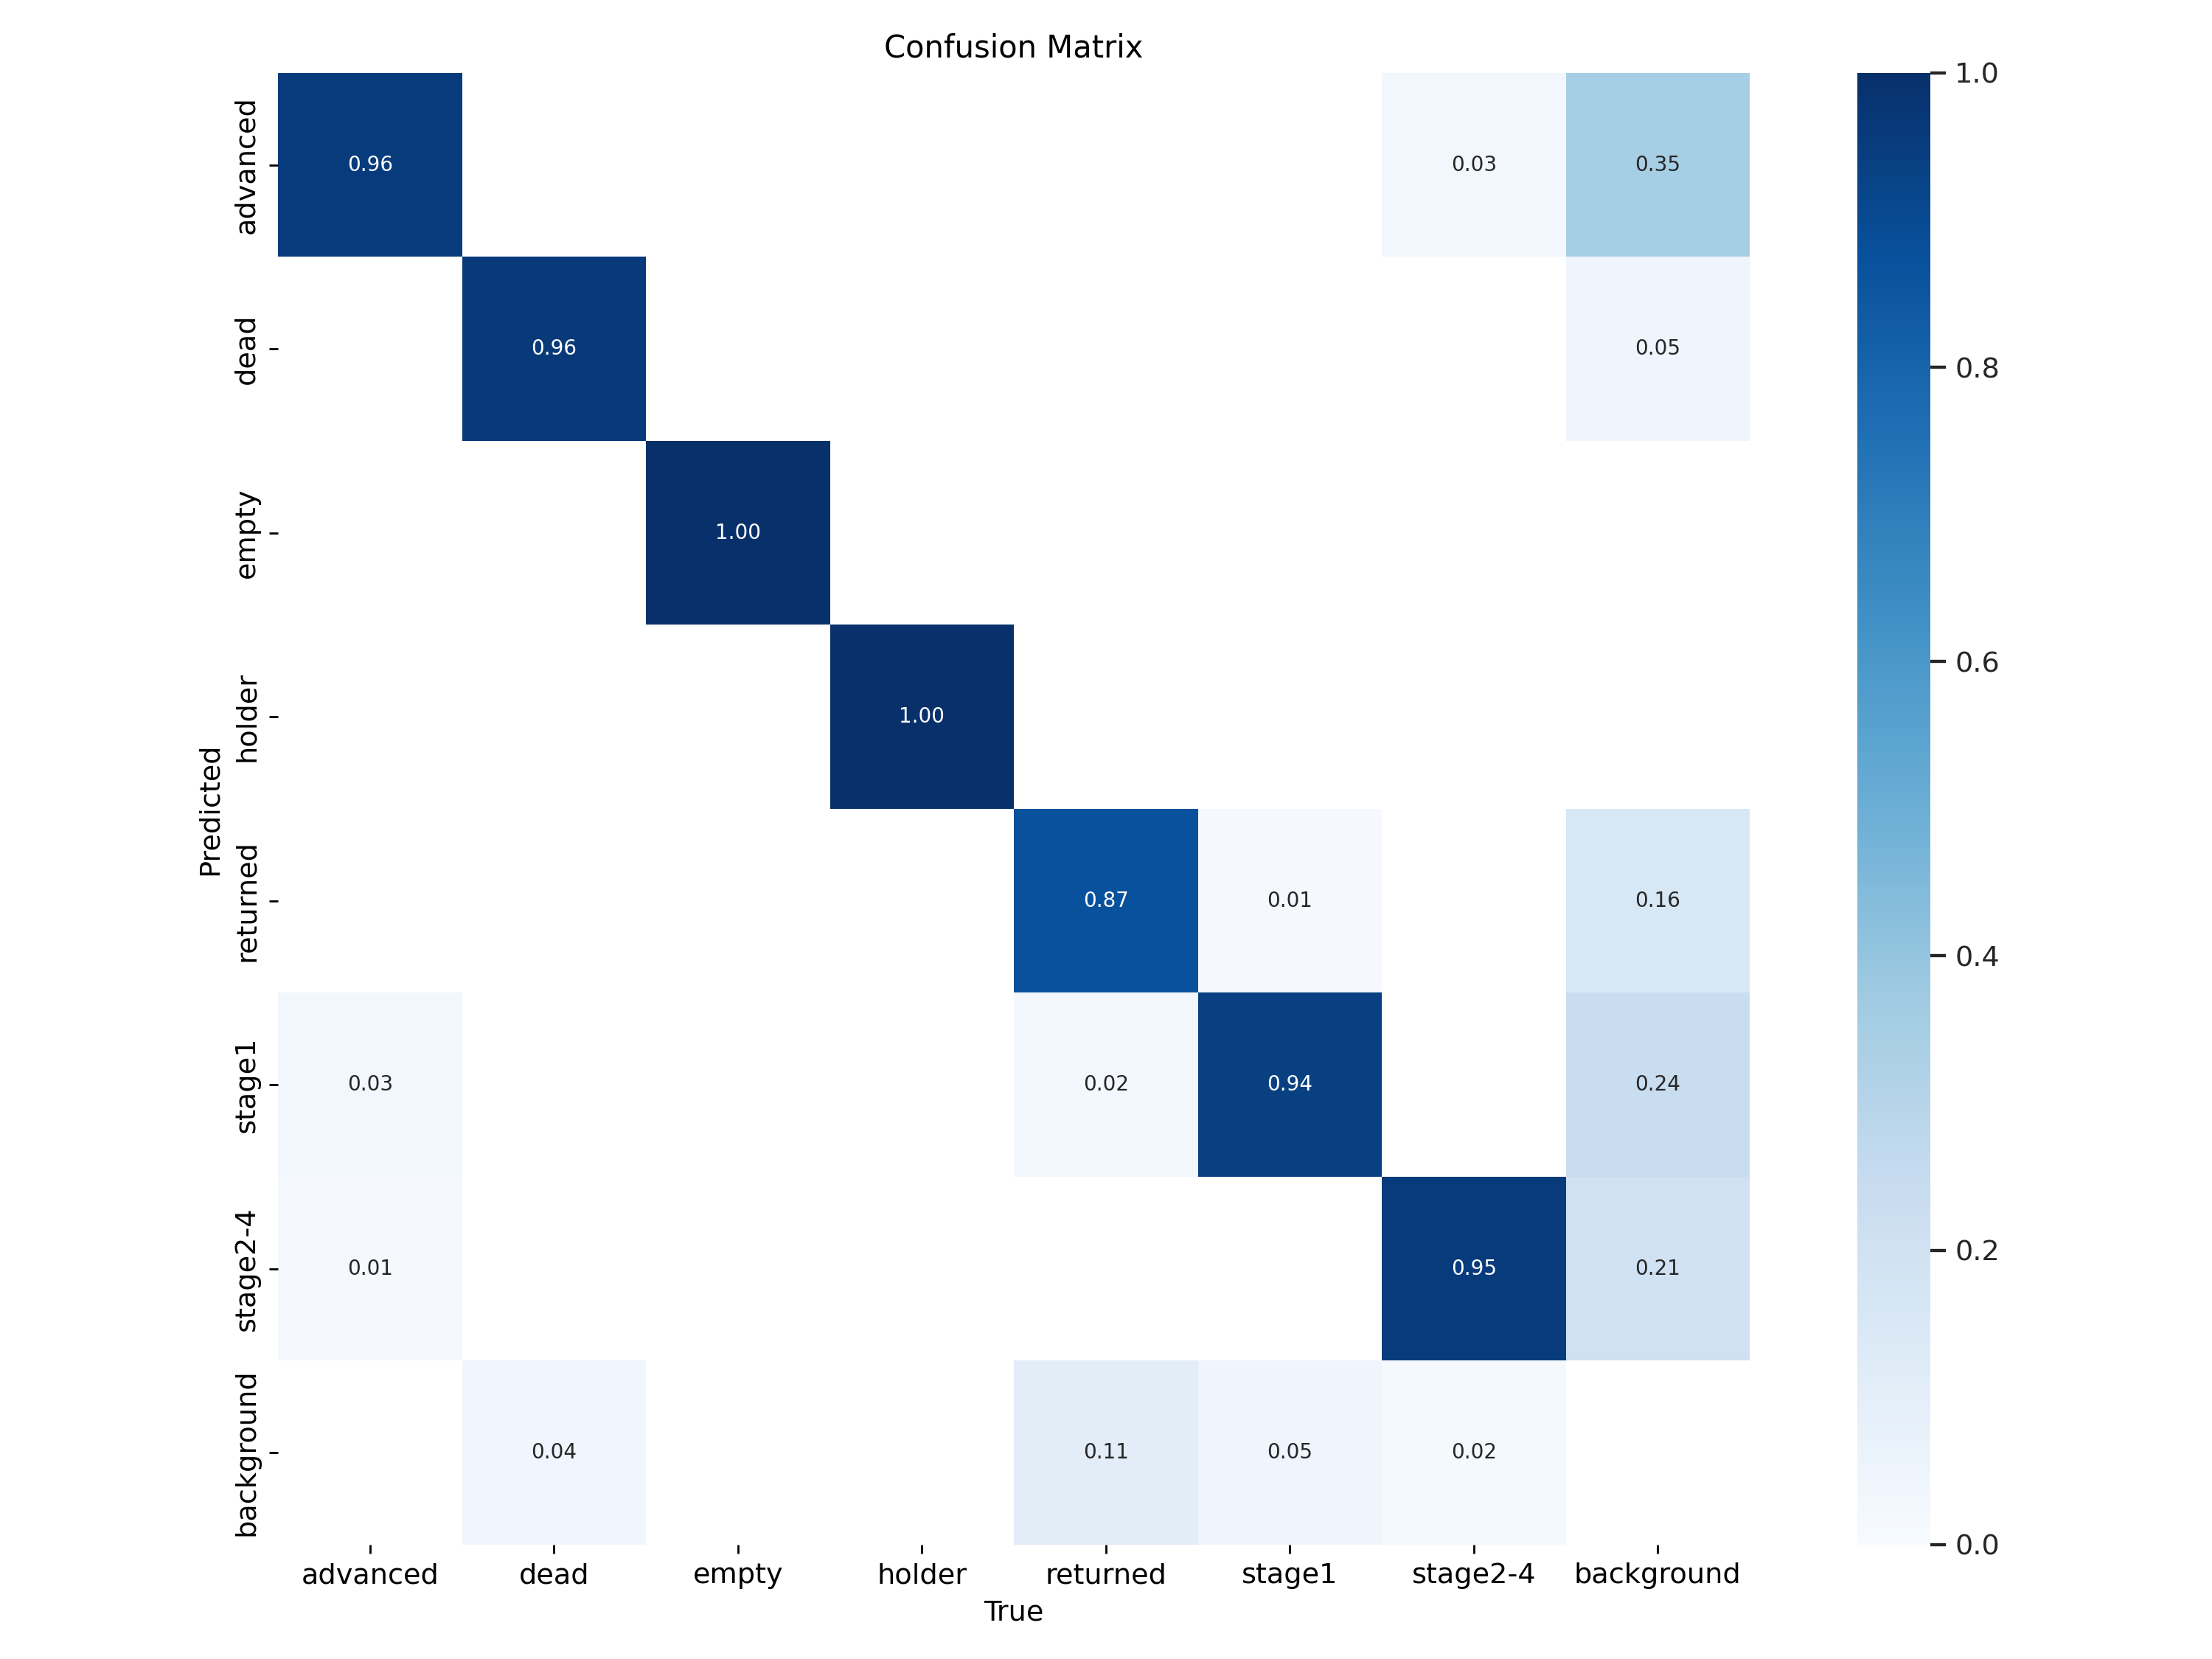

In [32]:
Image(filename='zebrafish-model/exp/confusion_matrix.png', width=800)

**Precision-Recall Curves (PR_curve.png, P_curve.png, R_curve.png, F1_curve.png)**

Purpose: *These curves provide insights into the model's precision, recall, and F1-score across various thresholds. They are helpful for understanding the model’s performance at different confidence levels.*

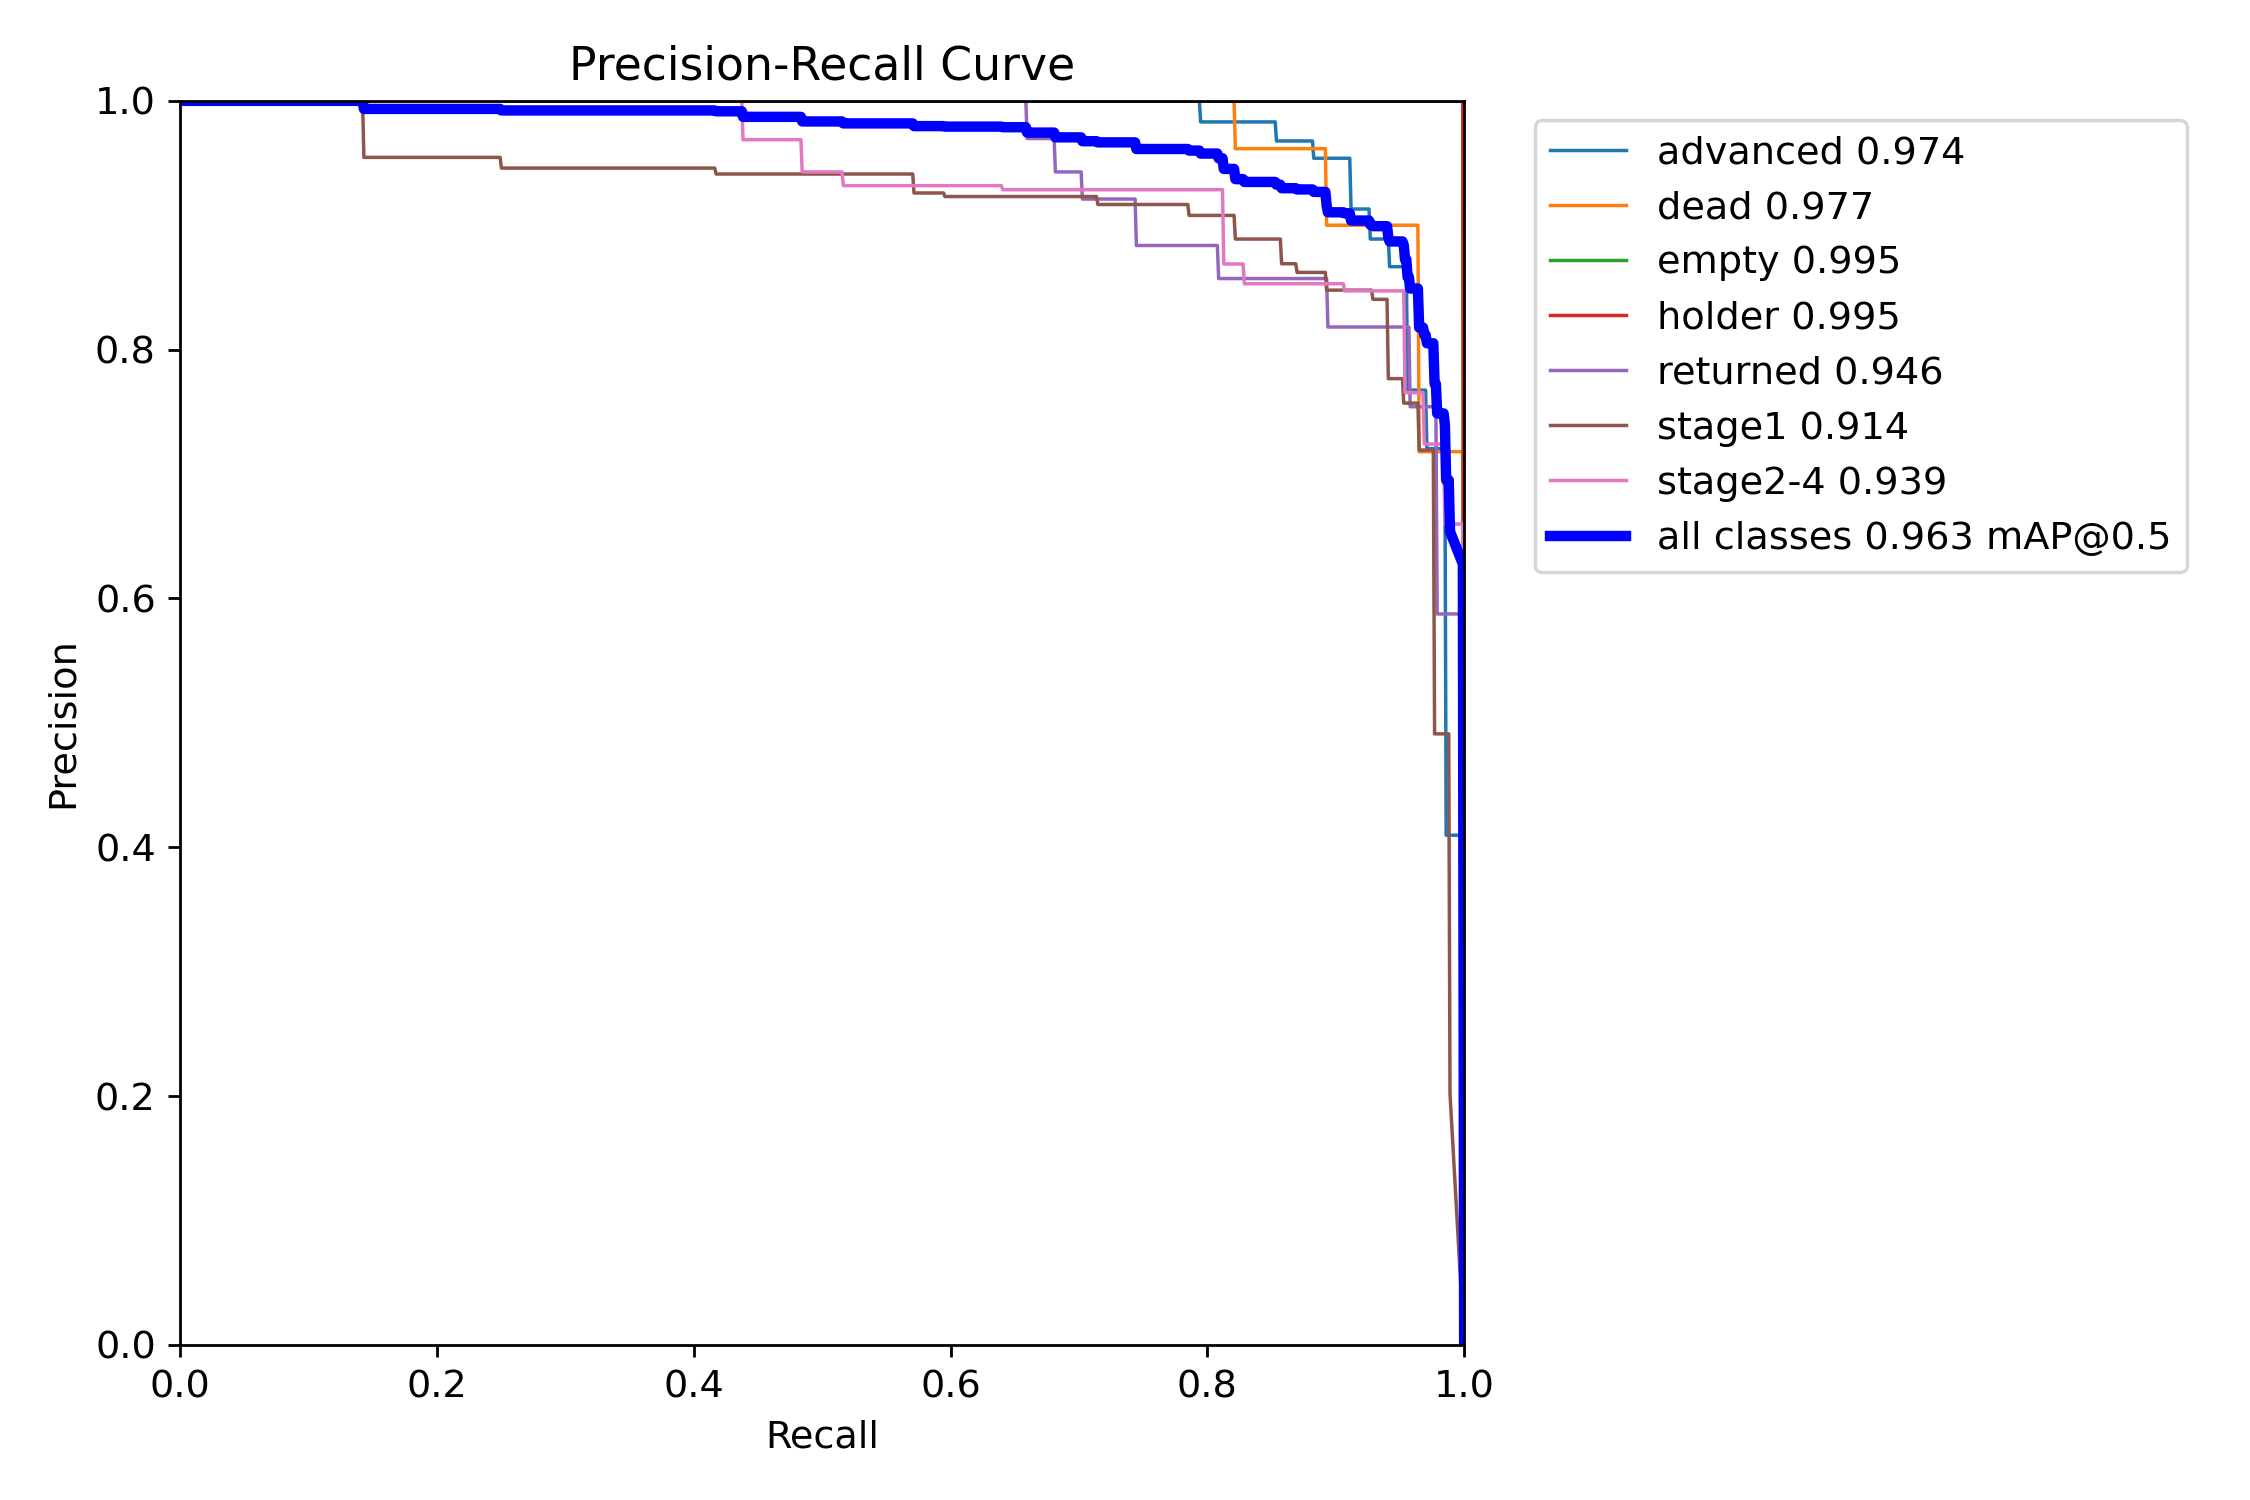

In [34]:
Image(filename='zebrafish-model/exp/PR_curve.png', width=800)  # For Precision-Recall Curve
  # For F1 Curve


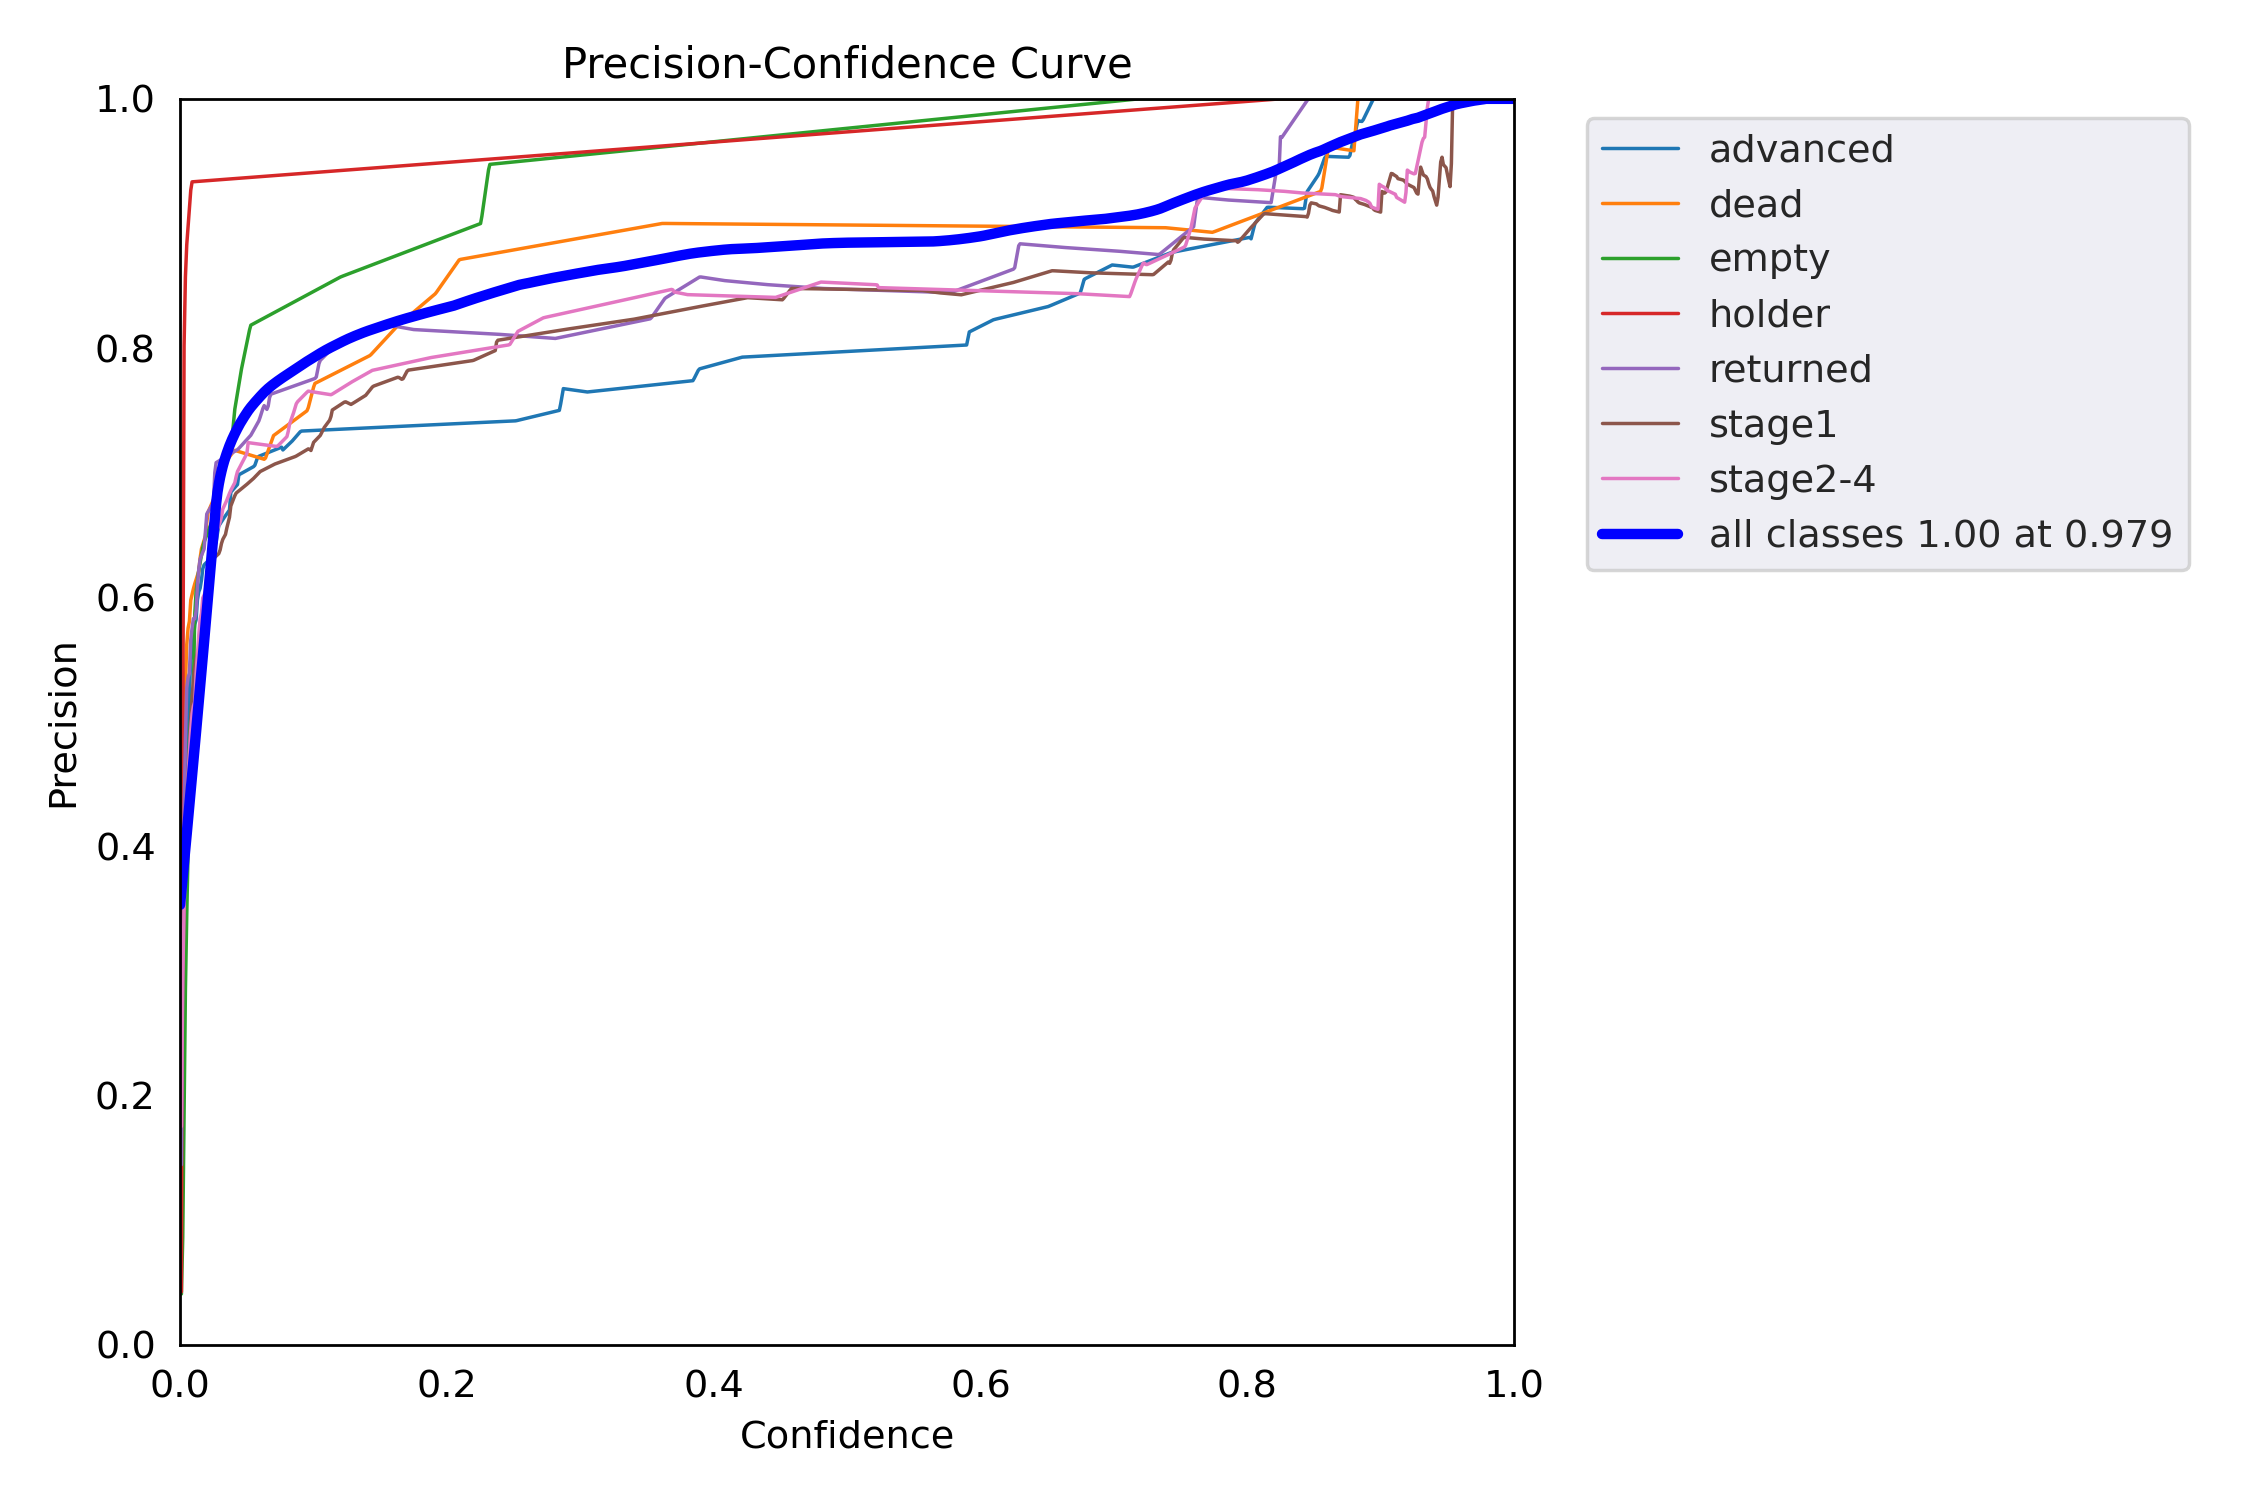

In [35]:
Image(filename='zebrafish-model/exp/P_curve.png', width=800)   # For Precision Curve


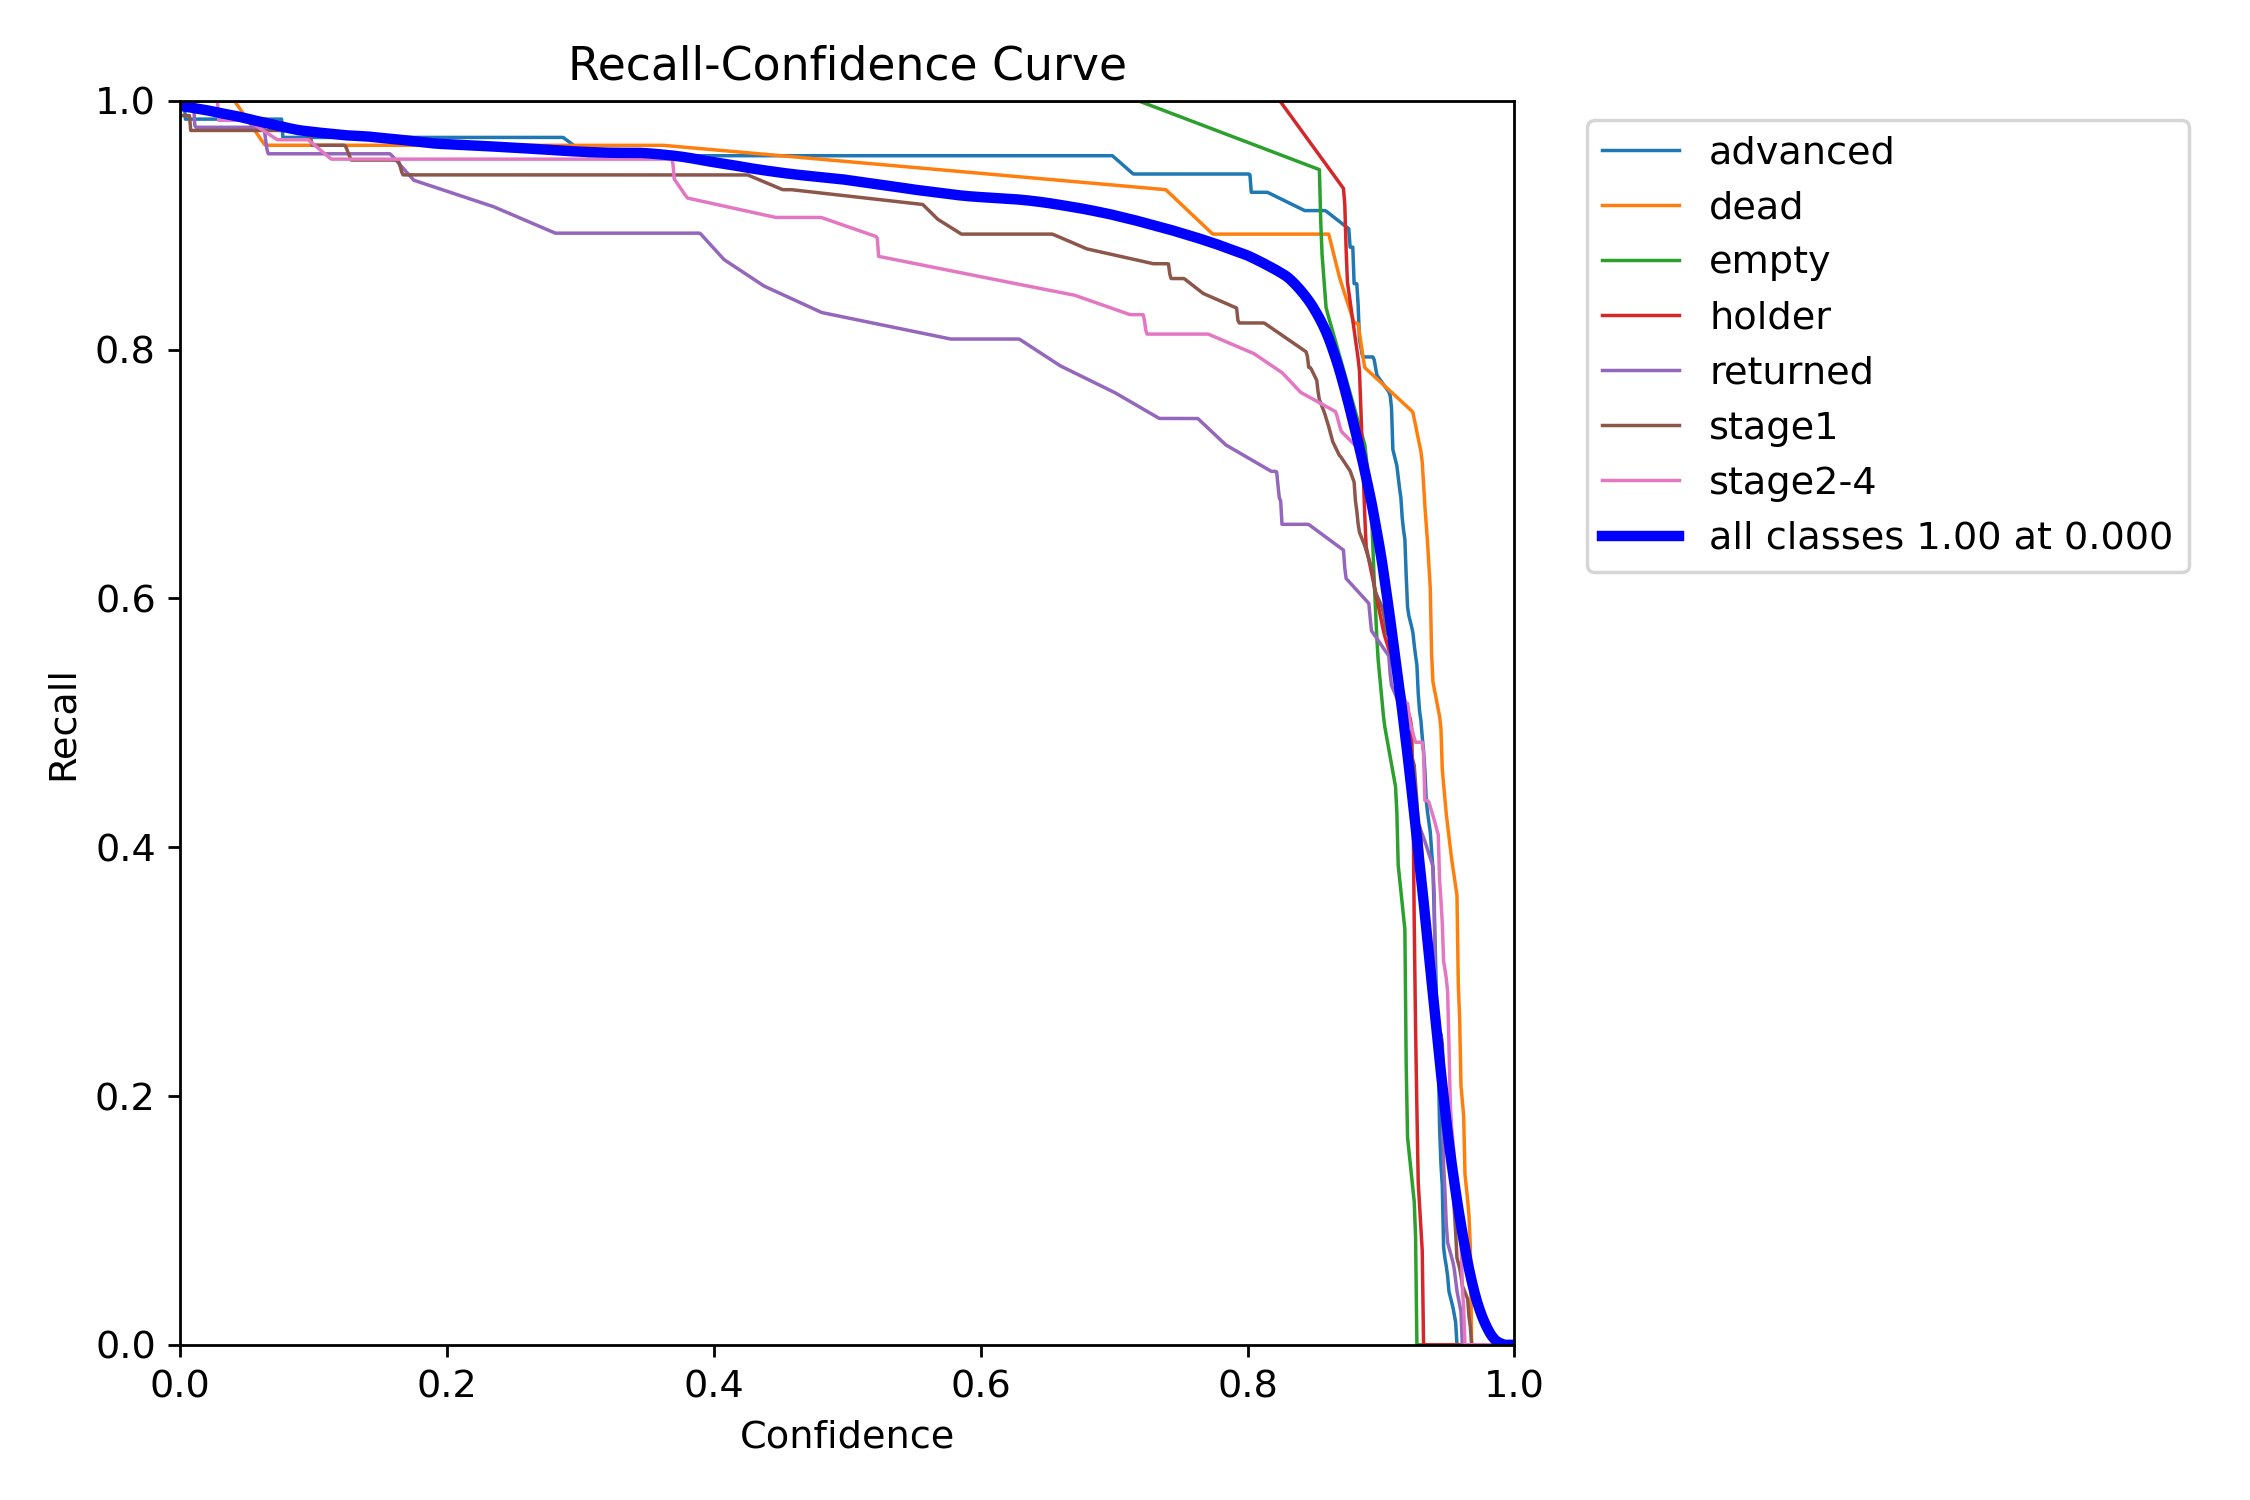

In [36]:
Image(filename='zebrafish-model/exp/R_curve.png', width=800)   # For Recall Curve

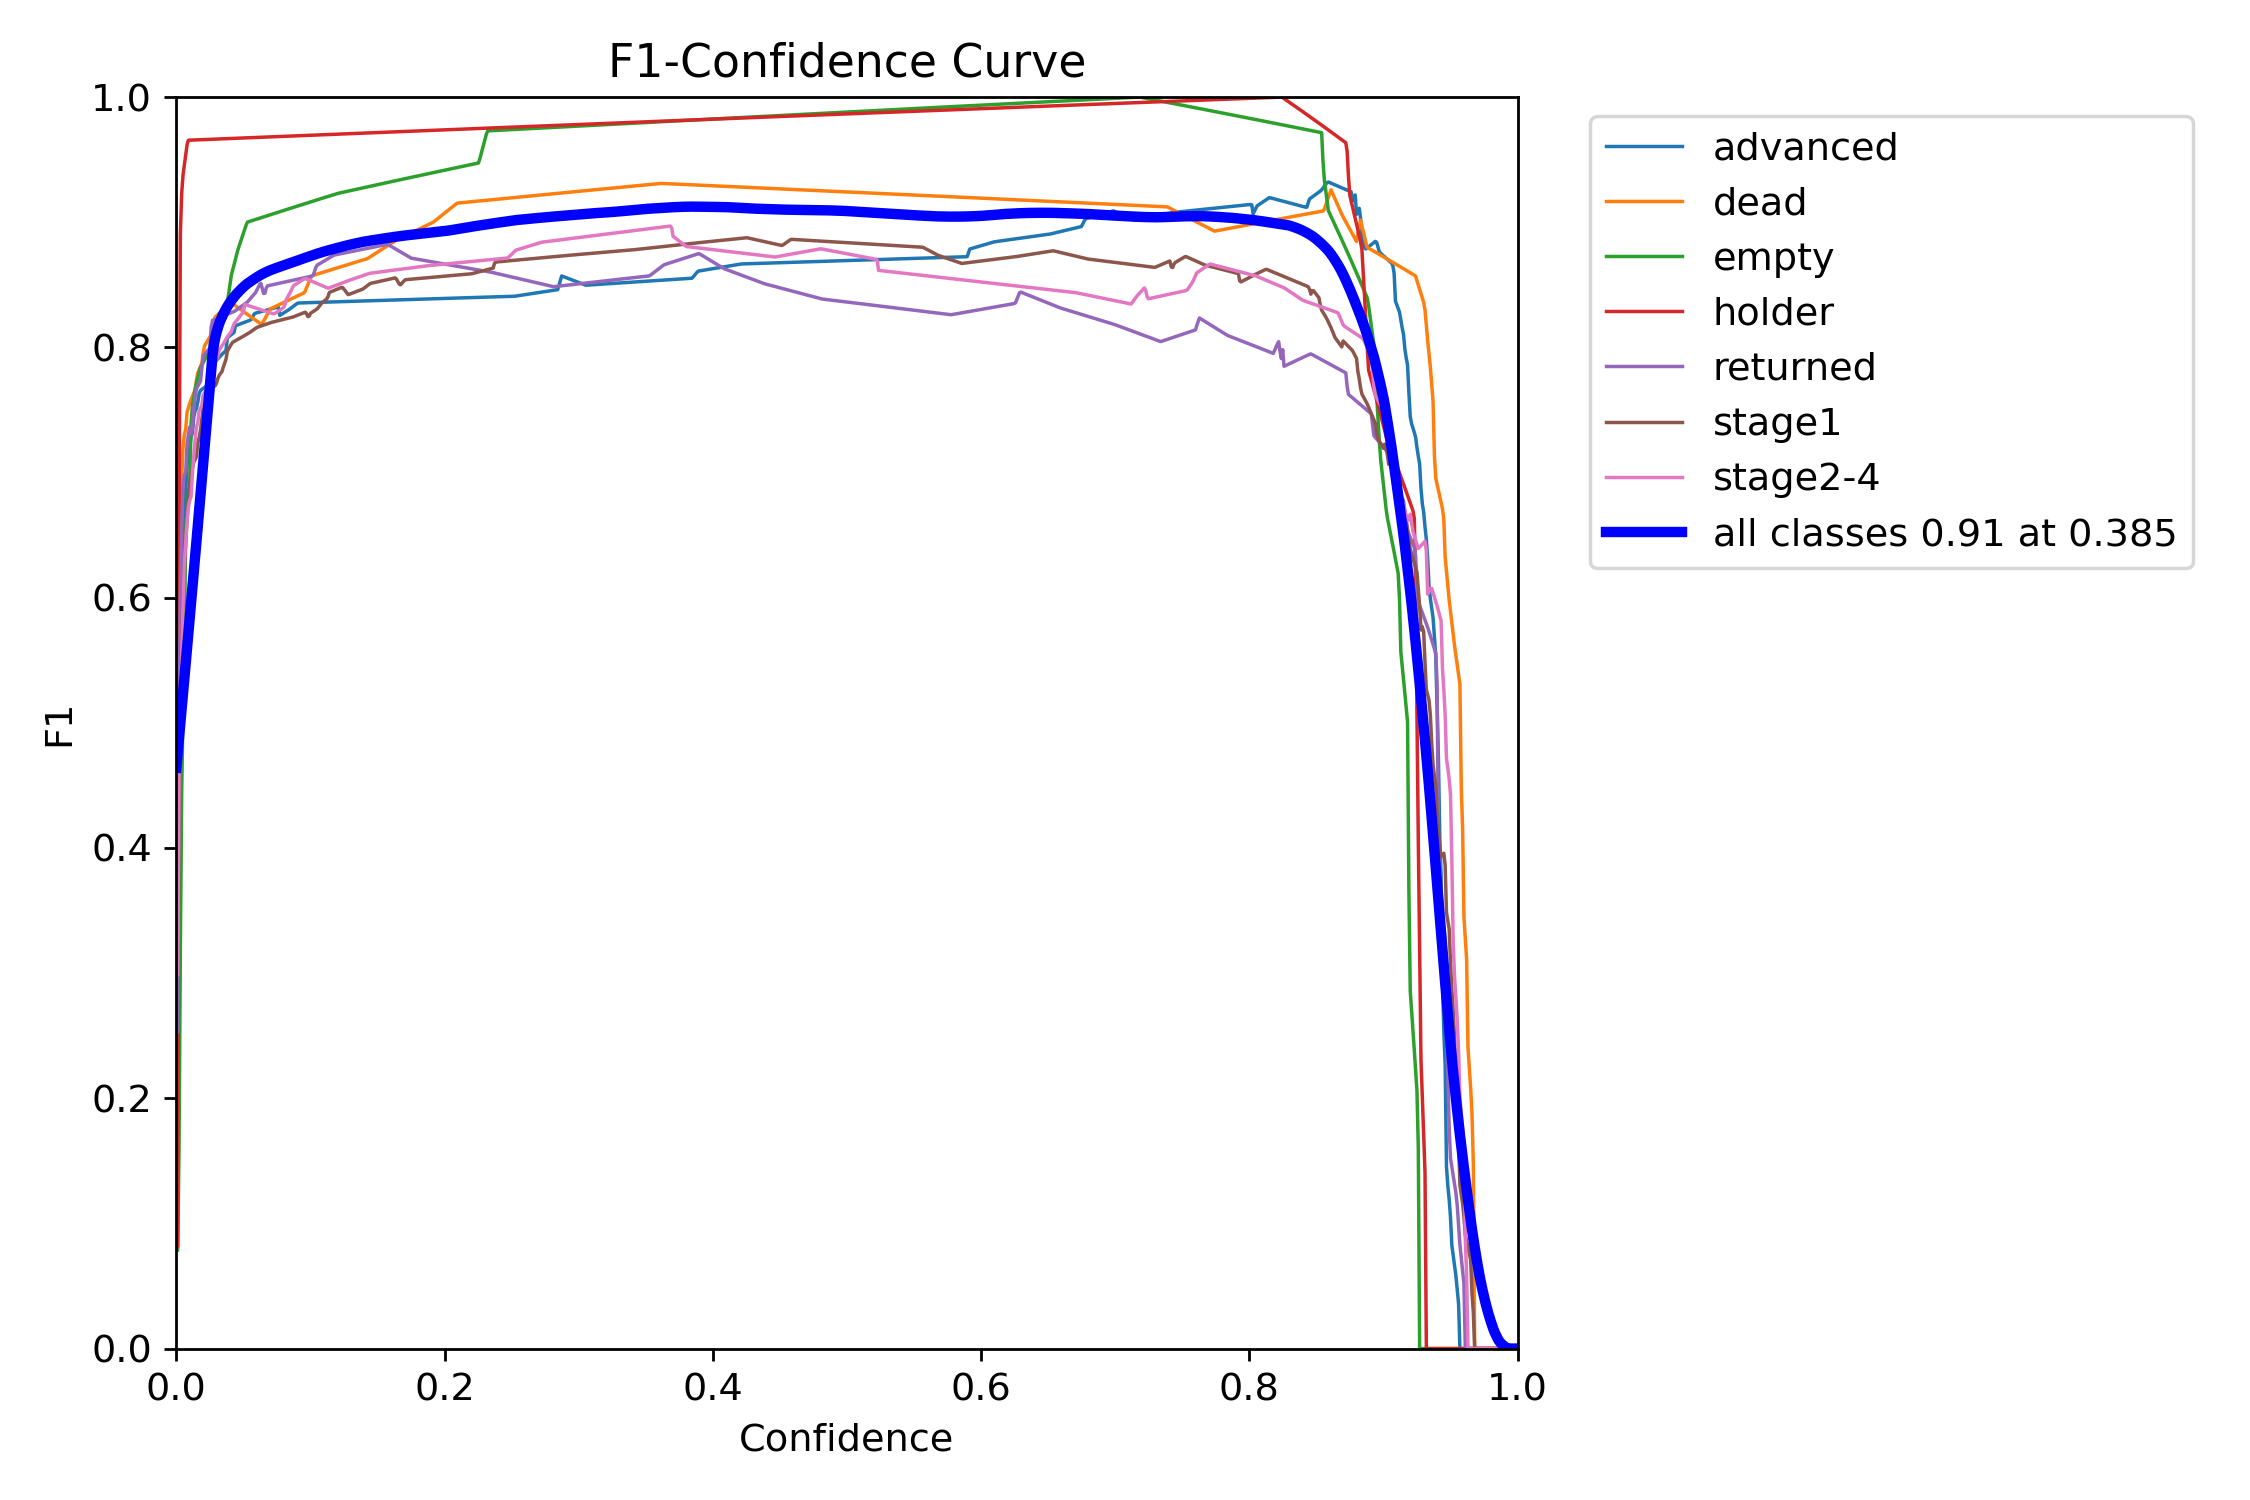

In [37]:
Image(filename='zebrafish-model/exp/F1_curve.png', width=800) #For f1 cureve

**val_batch_pred.jpg and val_batch_labels.jpg**

*These images show the model's predictions (_pred.jpg) alongside the ground truth labels (_labels.jpg) for validation batches. They are useful for visually confirming that the model is detecting objects correctly.*

**Predictions**

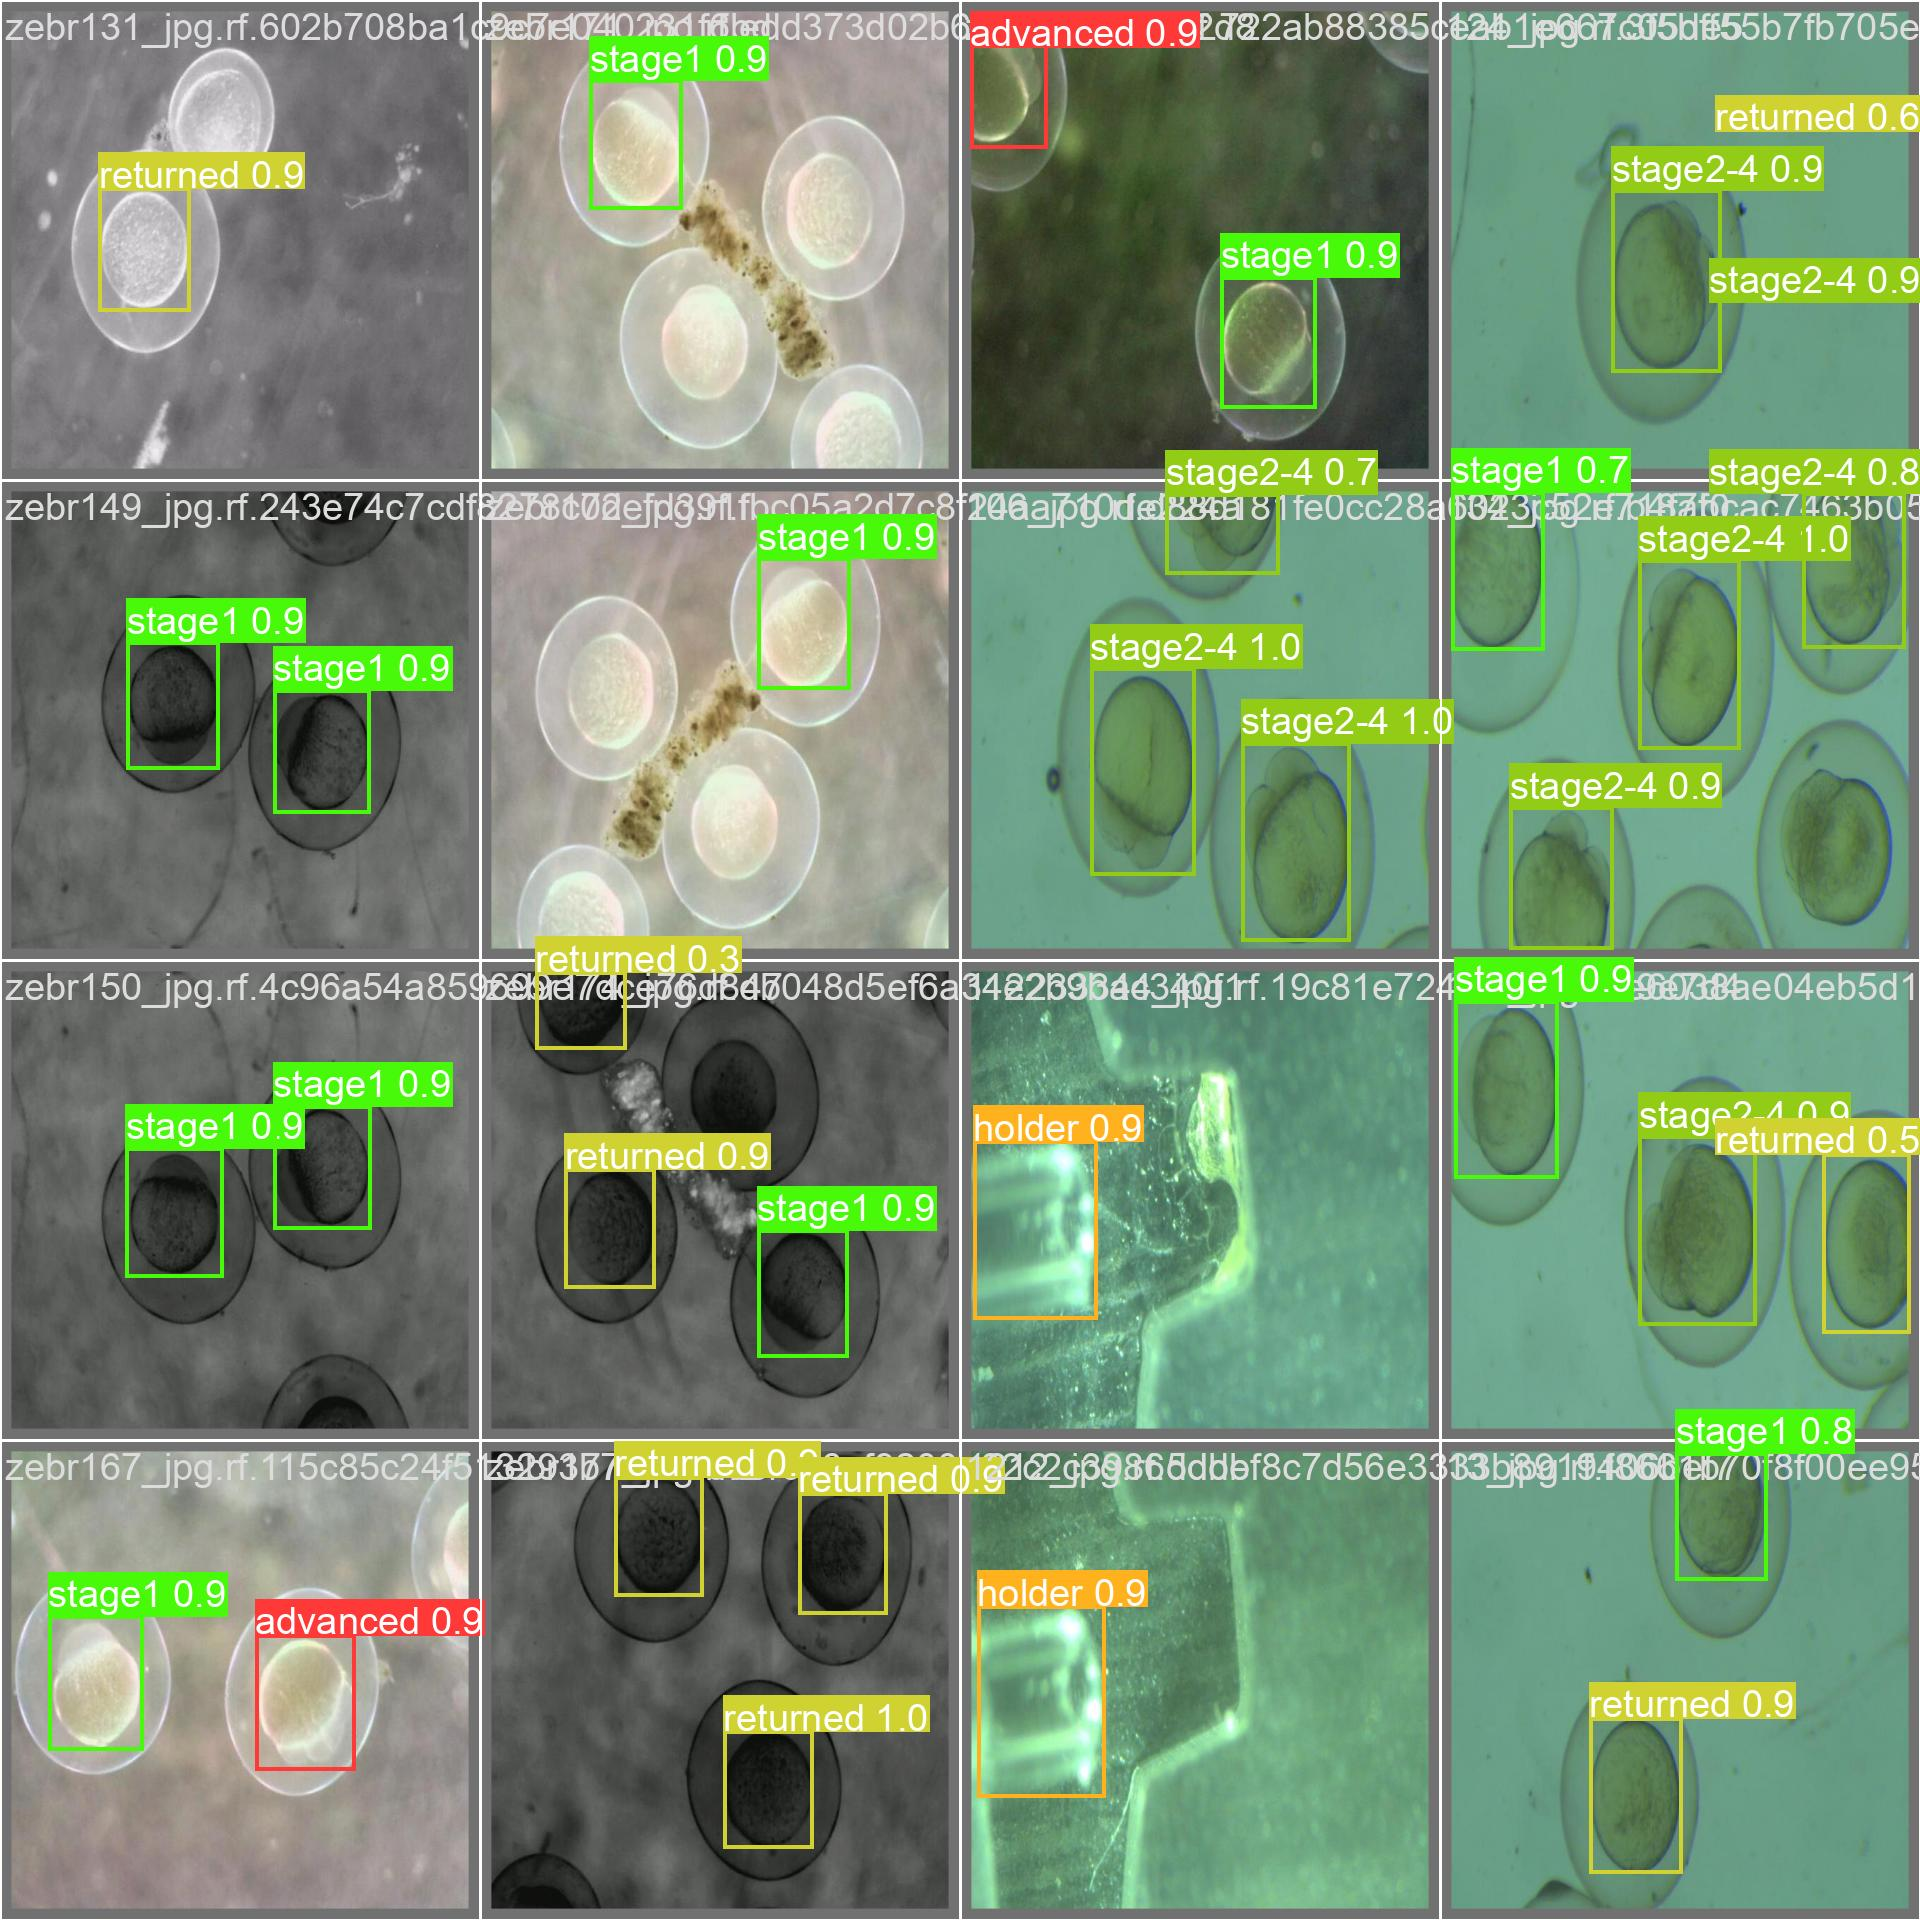

In [39]:
Image(filename='zebrafish-model/exp/val_batch0_pred.jpg', width=800)  # Predictions

**Ground Truth**

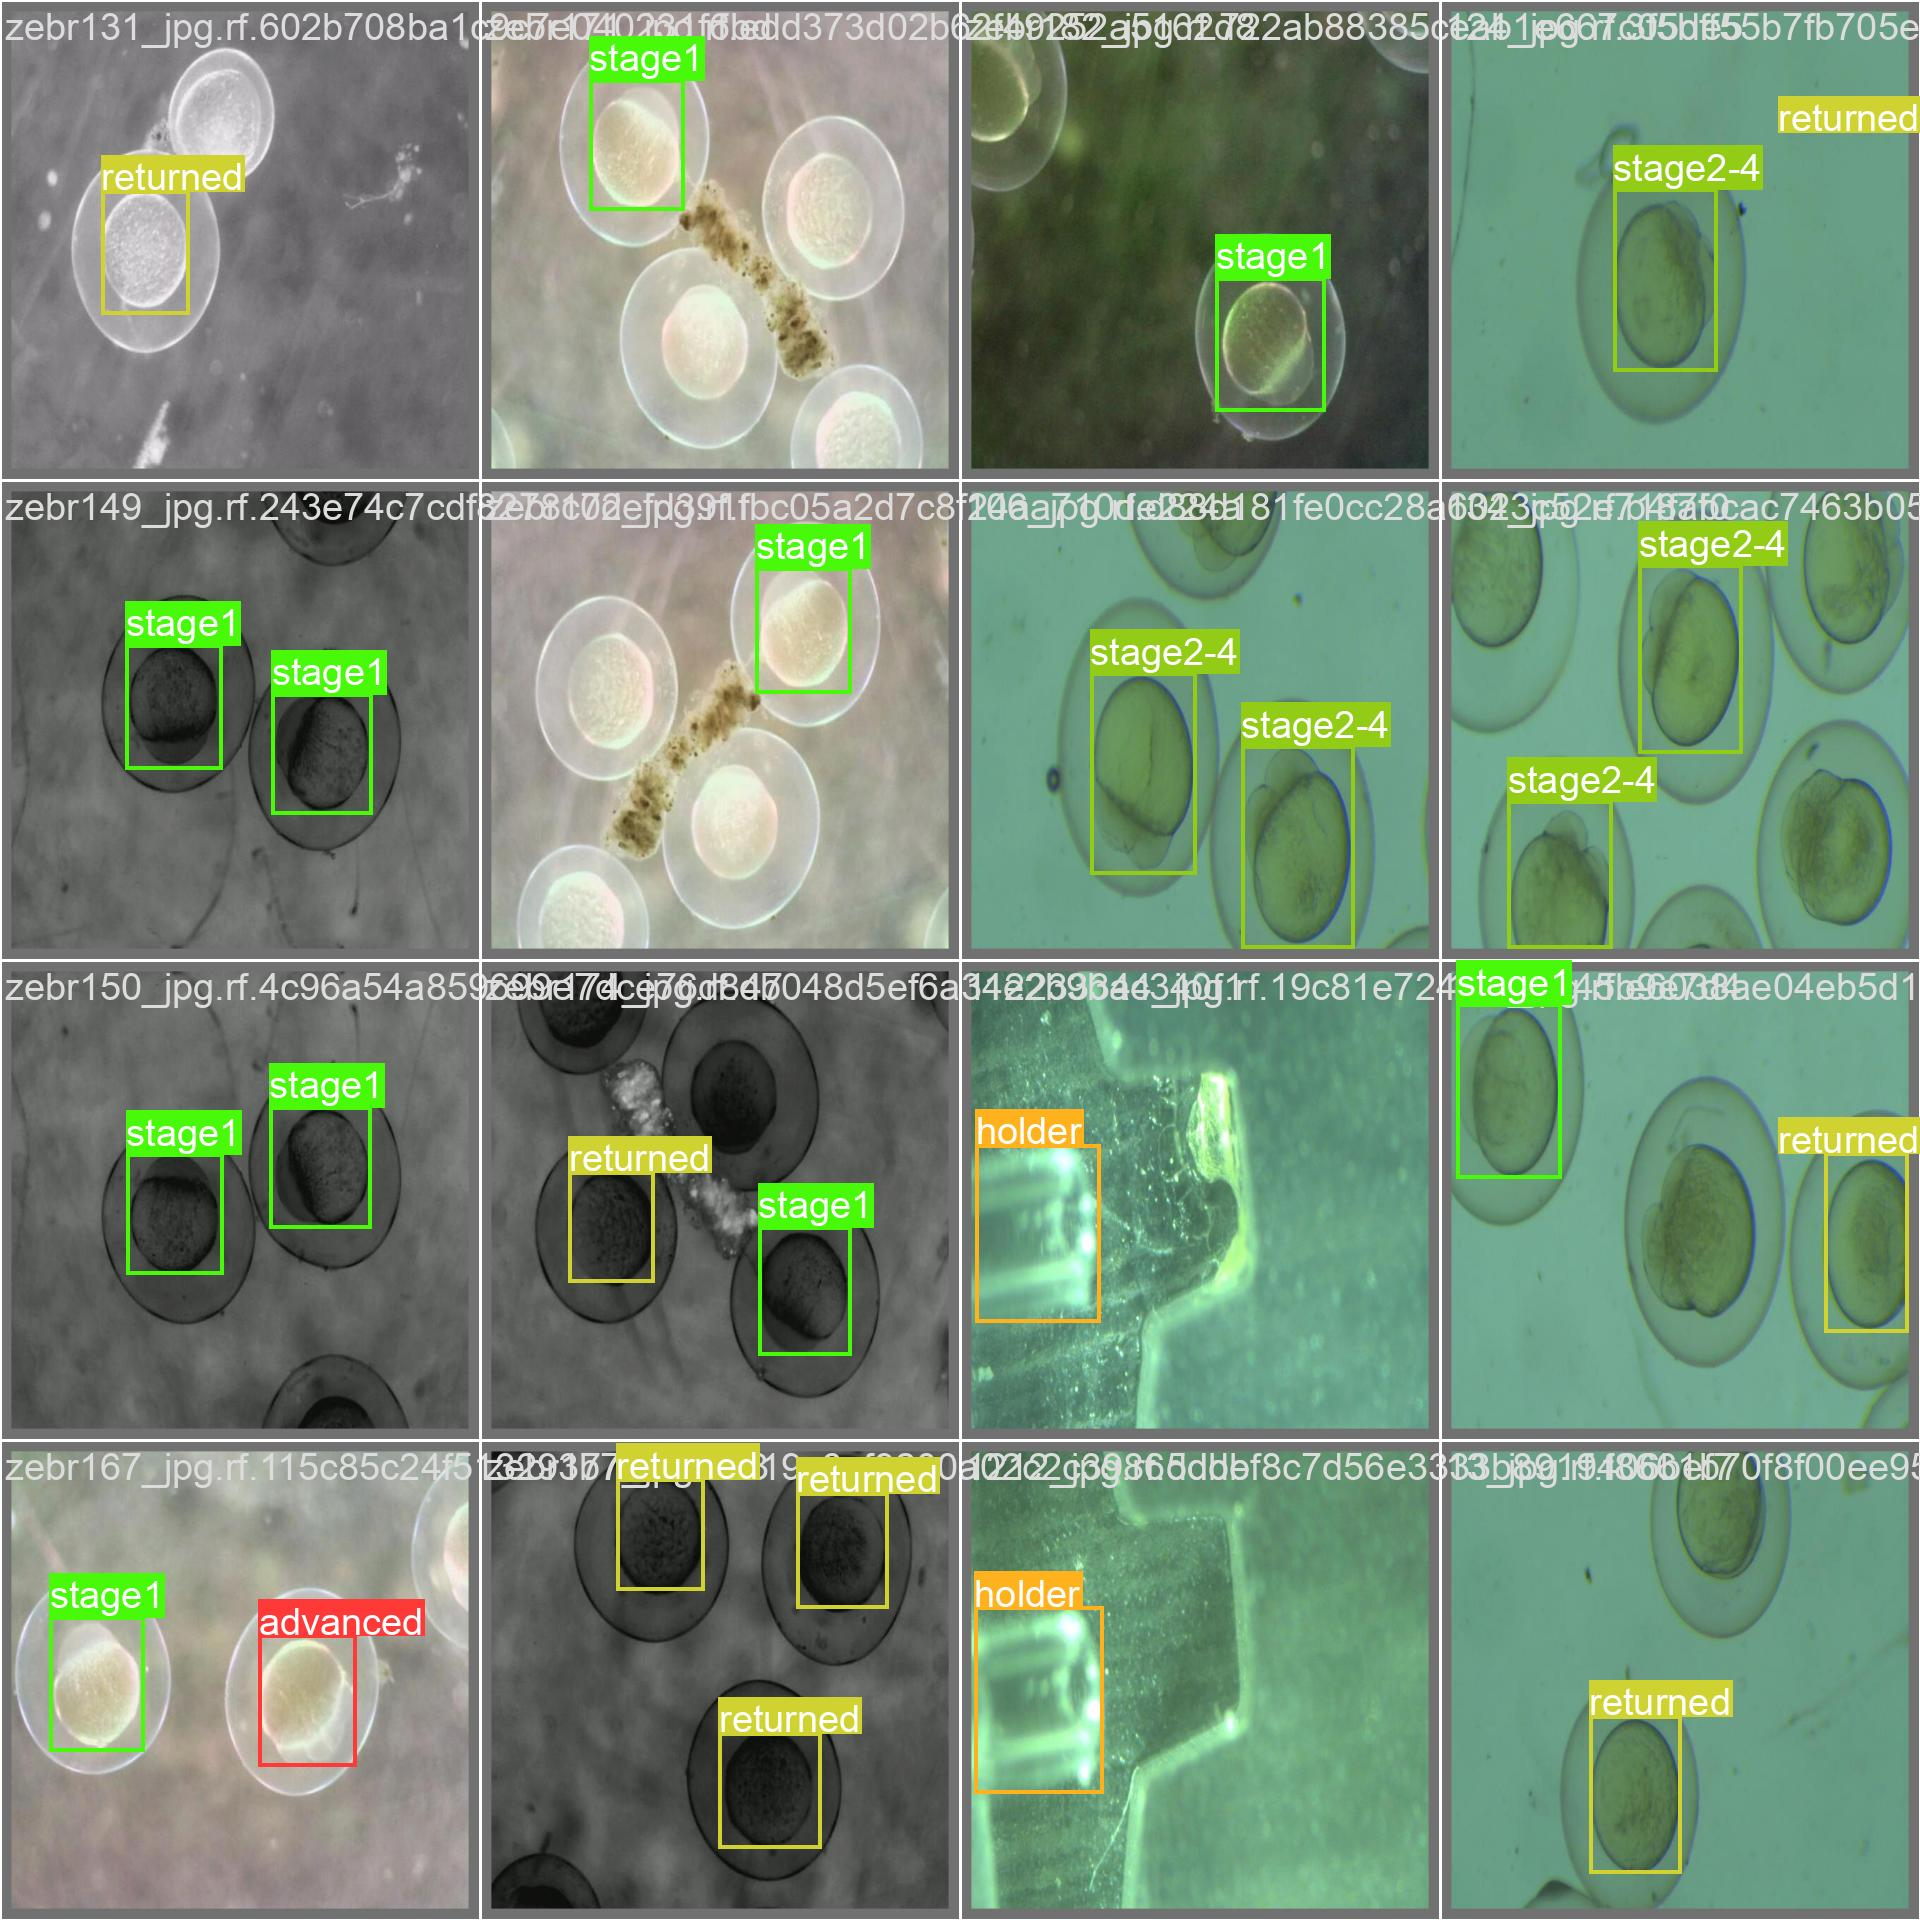

In [40]:
Image(filename='zebrafish-model/exp/val_batch0_labels.jpg', width=800) # Ground Truth